> ТК-41 Богдан Заяць

# Алгонритм обчислення значень розподілу ймовірностей кількох подій

In [1]:
precision = 4


def print_distribution(distribution, precision):
    _sum = 0
    for k, p_k in enumerate(distribution):
        _sum += p_k
        print(f"p{k} = {p_k:.{precision}}")
    print(f"sum = {_sum:.{precision}}")


## Проблема

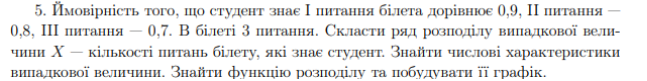

Ймовірність того, що студент знає I питання білета дорівнює 0,9,  
II питання -0,8, III питання - 0,7. В бiлетi 3 питання. 
Скласти ряд розподілу випадкової величини Х — кількості питань бiлету, які знає студент.    
Знайти числові характеристики випадкової величини. Знайти функцію розподілу та побудувати її графік.  

In [2]:
p_first_question = 0.9
p_second_question = 0.8
p_third_question = 0.7

n = 3

q1 = 1 - p_first_question
q2 = 1 - p_second_question
q3 = 1 - p_third_question


# Вирішення

> Алгортм:  

У множиній ймовірностей настання подій значення ймовірності настання події на ймовірністі їм протилежних змінюються як змійка.   
Змійка росте з більшою кількістю подій, яка не настала. При розгляді окремого випадку змінених множин утворюється в буде рівно стільки,  
скільки є елементів у початковому списку потім добутки елементів з кожної множини додаються між собою. Таких випадків є стільки,скільки подій.  
Якщо відбудуться всі події, тоді результом буде добуток ймовірностей, а якщо жодна -- ймовірностей протилежних подій.   
Усі резульати вносяться у множину розподілу. А щоб індекс ймовірності був рівний кількості подій, яка відбулася, ми множину цю, яка є впорядкованою розвертаємо.

In [3]:
distribution = list({})


In [4]:
probabillities = [p_first_question, p_second_question, p_third_question]


In [5]:
def previous(current, min, max):
    if current == min:
        return max
    return current - 1


def next(current, min, max):
    if current == max:
        return min
    return current + 1


In [6]:
import math


def snake_distrtibution(list):
    slice_len = 1
    n = len(list)
    distrib = []

    for segments in range(n + 1):
        if segments == 0:
            probabillity = math.prod(list)
            distrib.append(probabillity)
            continue
        elif segments == n:
            the_list = [1-p for p in list.copy()]
            probabillity = math.prod(the_list)
            distrib.append(probabillity)
            break

        probabillities = []

        for head in range(n):
            the_list = list.copy()

            for k, p in enumerate(the_list):
                if head == k:
                    current = head
                    for segment in range(segments):
                        the_list[current] = 1 - the_list[current]
                        current = previous(current, 0, n-1)

            probabillity = math.prod(the_list)
            probabillities.append(probabillity)

        probabillity = sum(probabillities)
        distrib.append(probabillity)

    # щоб індекс ймовірності був рівний кількості подій, яка відбулася, ми множину цю, яка є впорядкованою розвертаємо
    return (reversed(distrib))


In [7]:

distribution = snake_distrtibution(probabillities)
print_distribution(distribution, precision)


p0 = 0.006
p1 = 0.092
p2 = 0.398
p3 = 0.504
sum = 1.0


## Візуалізація роботи алгоритму

In [8]:

numbers = [0, 5, 25, 9, 4, 5, 6]


In [9]:
def snake_in_array_rotation(list):
    slice_len = 1
    n = len(list)
    distrib = []
    print(f"Цей список {list}, містить {n} елементів")

    for segments in range(n + 1):
        print("Кількість сегментів:", segments)
        if segments == 0:
            print(list)
            print(" ")
            continue
        elif segments == n:
            the_list = list.copy()

            for i in range(n):
                the_list[i] = "=="

            the_list[n-1] = "=>"
            print(the_list)
            break

        for head in range(n):
            the_list = list.copy()

            for k, p in enumerate(the_list):
                if head == k:
                    current = head
                    for segment in range(segments):
                        if segment == 0:
                            the_list[current] = "=>"
                        else:
                            the_list[current] = "=="
                        current = previous(current, 0, n-1)
            print(the_list)
            print(" ")


In [10]:
snake_in_array_rotation(numbers)


Цей список [0, 5, 25, 9, 4, 5, 6], містить 7 елементів
Кількість сегментів: 0
[0, 5, 25, 9, 4, 5, 6]
 
Кількість сегментів: 1
['=>', 5, 25, 9, 4, 5, 6]
 
[0, '=>', 25, 9, 4, 5, 6]
 
[0, 5, '=>', 9, 4, 5, 6]
 
[0, 5, 25, '=>', 4, 5, 6]
 
[0, 5, 25, 9, '=>', 5, 6]
 
[0, 5, 25, 9, 4, '=>', 6]
 
[0, 5, 25, 9, 4, 5, '=>']
 
Кількість сегментів: 2
['=>', 5, 25, 9, 4, 5, '==']
 
['==', '=>', 25, 9, 4, 5, 6]
 
[0, '==', '=>', 9, 4, 5, 6]
 
[0, 5, '==', '=>', 4, 5, 6]
 
[0, 5, 25, '==', '=>', 5, 6]
 
[0, 5, 25, 9, '==', '=>', 6]
 
[0, 5, 25, 9, 4, '==', '=>']
 
Кількість сегментів: 3
['=>', 5, 25, 9, 4, '==', '==']
 
['==', '=>', 25, 9, 4, 5, '==']
 
['==', '==', '=>', 9, 4, 5, 6]
 
[0, '==', '==', '=>', 4, 5, 6]
 
[0, 5, '==', '==', '=>', 5, 6]
 
[0, 5, 25, '==', '==', '=>', 6]
 
[0, 5, 25, 9, '==', '==', '=>']
 
Кількість сегментів: 4
['=>', 5, 25, 9, '==', '==', '==']
 
['==', '=>', 25, 9, 4, '==', '==']
 
['==', '==', '=>', 9, 4, 5, '==']
 
['==', '==', '==', '=>', 4, 5, 6]
 
[0, '==', '=='

## Перевірка вручну

In [11]:
distribution = list({})


**Подія 0:**  Нічого він не вивчив, або  всі забув

In [12]:
p_none = q1*q2*q3
print(
    f"ймовірність того, що студент нічого не вивчив = {round(p_none,precision)}")

distribution.append(p_none)


ймовірність того, що студент нічого не вивчив = 0.006


**Подія 1:** лише одине питання

In [13]:
p_one_question = p_first_question * q2 * q3 + q1 * \
    p_second_question * q3 + q1 * q2 * p_third_question
print(
    f"ймовірність того, що студент  вивчив лише одне питання = {round(p_one_question,precision)}")

distribution.append(p_one_question)


ймовірність того, що студент  вивчив лише одне питання = 0.092


**Подія 2:** лише два білети

In [14]:
p_two_questions = p_first_question * p_second_question * q3 + p_first_question * \
    q2 * p_third_question + q1 * p_second_question * p_third_question
p_two_questions

print(
    f"ймовірність того, що студент  вивчив лише два питання = {round(p_two_questions,precision)}")

distribution.append(p_two_questions)


ймовірність того, що студент  вивчив лише два питання = 0.398


**Подія 3:** Всі три білети

In [15]:
p_all = p_first_question * p_second_question * p_third_question

print(
    f"ймовірність того, що студент  вивчив усі питання = {round(p_all,precision)}")

distribution.append(p_all)


ймовірність того, що студент  вивчив усі питання = 0.504


Перевіряю правильність підрахунку розподілу

In [16]:
_sum = p_none + p_one_question + p_two_questions + p_all
_sum


1.0

Значення ймовірностей обчислені правильно,бо **їх сума рівна одиниці!**